In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88, got 80
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shrt/top', 'trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankele boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

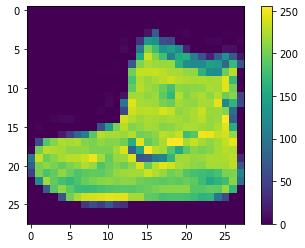

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

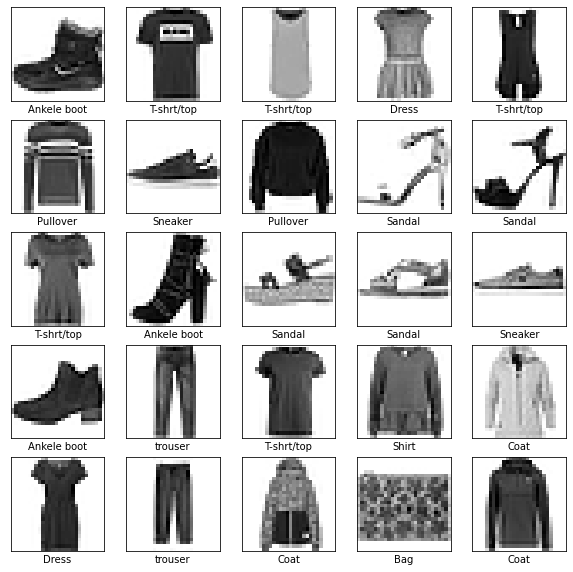

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6241 - accuracy: 0.7811
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3834 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3393 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3140 - accuracy: 0.8824
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2903 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2819 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2646 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2555 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2465 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accracy:', test_acc)

313/313 - 1s - loss: 0.3320 - accuracy: 0.8825

Test accracy: 0.8824999928474426


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
predictions[0]

array([2.2922607e-07, 4.3485694e-11, 1.9323355e-08, 1.7991190e-10,
       6.5711951e-09, 1.5023978e-03, 9.8017654e-07, 3.3758990e-03,
       3.8422463e-08, 9.9512047e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]), color= color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

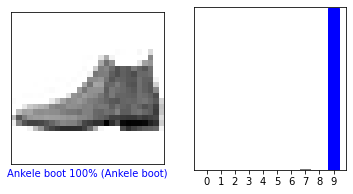

In [24]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

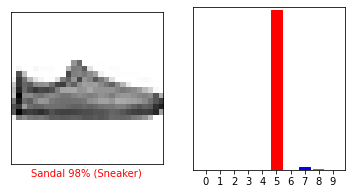

In [26]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

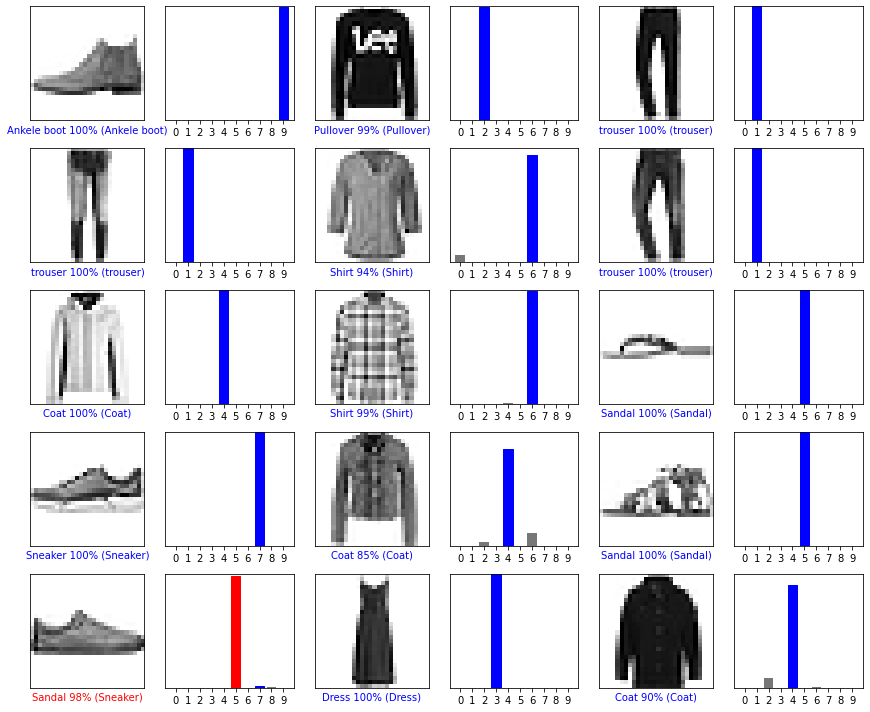

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
img = test_images[1]
print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.1536793e-05 1.7560277e-12 9.9377668e-01 1.4880475e-11 4.4316975e-03
  1.8955287e-13 1.7800627e-03 4.0334205e-13 9.9801467e-10 8.6610830e-15]]


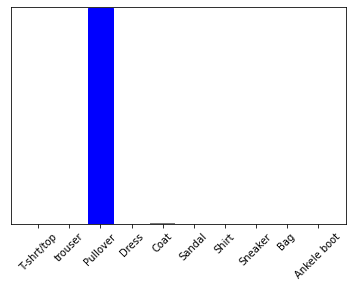

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

plt.show()

In [35]:
np.argmax(predictions_single[0])

2